<a href="https://colab.research.google.com/github/Millicent-Willy/Python-Coding/blob/main/Visualizing_financial_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualizing data for Exploratory Analysis**

Enables us to understand data deeply by identifying relationships, patterns and outliers more easily.

In [3]:
# importing python packages
#%matplotlib inline, with this line of code, the plot output will be displayed in the notebook directlybelow the code cell that produces it. The plots will also be stored in the the notebook document.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#Import the CSV and create  df

df = pd.read_csv('Chapter Exercise Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           1000 non-null   int64  
 1   PricePerItem      1000 non-null   int64  
 2   Quantity          1000 non-null   int64  
 3   ShippingDistance  994 non-null    float64
 4   CustomerID        1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [5]:
df.head(5)

,OrderID,PricePerItem,Quantity,ShippingDistance,CustomerID
0,1,10,5,3.0,6671
1,2,10,10,84.0,8647
2,3,10,1,NaN,4075
3,4,10,10,92.0,8452
4,5,10,3,2.0,2621


In [6]:
# Checking any null values in the dataset
df.isnull().sum()

OrderID             0
PricePerItem        0
Quantity            0
ShippingDistance    6
CustomerID          0
dtype: int64

In [7]:
#filling the above six rows in the DhippingDistance column with zero
df.fillna(0)

,OrderID,PricePerItem,Quantity,ShippingDistance,CustomerID
0,1,10,5,3.0,6671
1,2,10,10,84.0,8647
2,3,10,1,0.0,4075
3,4,10,10,92.0,8452
4,5,10,3,2.0,2621
...,...,...,...,...,...
995,996,10,8,2.0,6691
996,997,10,9,43.0,9782
997,998,10,2,10.0,1096
998,999,10,9,49.0,5319


In [8]:
#creating a revenue column
df['Revenue']=df['PricePerItem'] * df['Quantity']
df['Revenue']

0       50
1      100
2       10
3      100
4       30
      ... 
995     80
996     90
997     20
998     90
999     40
Name: Revenue, Length: 1000, dtype: int64

**HISTOGRAM**

A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal. It can also show any outliers or gaps in the data. In brief, a histogram summarizes the distribution properties of a continuous numerical variable

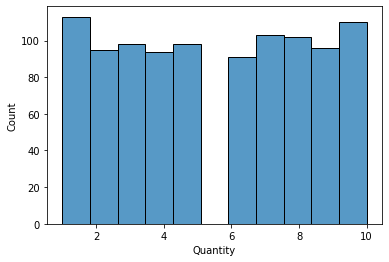

In [11]:
# John wants to see the number of products contained in each order.
# the distribution of quantity
# Therefore we create an histogram from the dataset.

sns.histplot(df['Quantity']); # ending the statement with comma gives a clean figure


In [29]:
# Count the number of orderID for each CustomerID

df.groupby('CustomerID')['Quantity'].count()

CustomerID
10      1
20      1
33      1
61      1
67      1
       ..
9926    1
9943    1
9948    2
9956    1
9978    1
Name: Quantity, Length: 947, dtype: int64

In [39]:
# Adding a dataframe
Cust_orders = pd.DataFrame(df.groupby('CustomerID')['Quantity'].count())
Cust_orders

,Quantity
CustomerID,
10,1
20,1
33,1
61,1
67,1
...,...
9926,1
9943,1
9948,2


In [43]:
# Count the number of customers for each order quantity
Orders_by_customer = pd.DataFrame(df.groupby('Quantity')['OrderID'].count())
Orders_by_customer


,OrderID
Quantity,
1,113
2,95
3,98
4,94
5,98
6,91
7,103
8,102
9,96


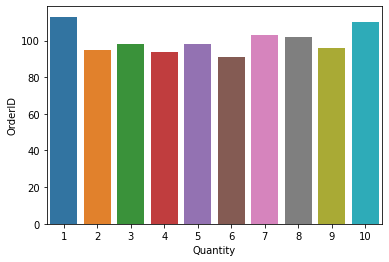

In [44]:
# Create a bar plot
sns.barplot(x=Orders_by_customer.index, y='OrderID', data=Orders_by_customer);

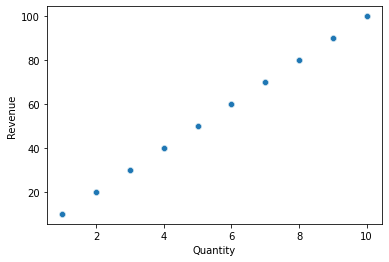

In [46]:
# John wants to know the relationship btwn quantity of products in an order and the amount paid for that order.
# Create a scatter plot of quantinty vs amount.
sns.scatterplot(x='Quantity', y='Revenue', data=df);

#This is a linear relationship-the larger the quantity within an order the higher the revenue